# EMPLOYEE TURNOVER PREDICTION

### IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')

### IMPORTING THE DATASET

In [2]:
data = pd.read_csv("Employee_Turnover_Prediction.csv")

### READING THE DATASET

In [3]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### EXPLORATORY DATA ANALYSIS

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [8]:
data.ndim

2

In [9]:
data.shape

(14999, 10)

In [10]:
data.size

149990

In [11]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [12]:
data.count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
sales                    14999
salary                   14999
dtype: int64

In [13]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

### DATA CLEANING

In [14]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

### STATISTICAL ANALYSIS

In [15]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### MEAN

In [16]:
np.mean(data)

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

#### MEDIAN

In [17]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

#### MODE

In [18]:
statistics.mode(data["satisfaction_level"])

0.1

In [19]:
statistics.mode(data["last_evaluation"])

0.55

In [20]:
statistics.mode(data["number_project"])

4

In [21]:
statistics.mode(data["average_montly_hours"])

135

In [22]:
statistics.mode(data["time_spend_company"])

3

In [23]:
statistics.mode(data["Work_accident"])

0

In [24]:
statistics.mode(data["left"])

0

In [25]:
statistics.mode(data["promotion_last_5years"])

0

In [26]:
statistics.mode(data["sales"])

'sales'

In [27]:
statistics.mode(data["salary"])

'low'

#### STANDARD DEVIATION

In [28]:
np.std(data)

satisfaction_level        0.248622
last_evaluation           0.171163
number_project            1.232551
average_montly_hours     49.941434
time_spend_company        1.460088
Work_accident             0.351707
left                      0.425910
promotion_last_5years     0.144277
dtype: float64

#### VARIANCE

In [29]:
np.var(data)

satisfaction_level          0.061813
last_evaluation             0.029297
number_project              1.519183
average_montly_hours     2494.146876
time_spend_company          2.131856
Work_accident               0.123698
left                        0.181399
promotion_last_5years       0.020816
dtype: float64

#### SKEWNESS

In [30]:
data.skew()

satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
dtype: float64

#### CORRELATION

In [31]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


#### INTERQUARTILE RANGE

In [32]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
iqr

satisfaction_level        0.38
last_evaluation           0.31
number_project            2.00
average_montly_hours     89.00
time_spend_company        1.00
Work_accident             0.00
left                      0.00
promotion_last_5years     0.00
dtype: float64

#### COEFFICIENT OF VARIANCE

In [33]:
data.cov()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,0.061817,0.004469,-0.043814,-0.248945,-0.036618,0.005133,-0.041128,0.000919
last_evaluation,0.004469,0.029299,0.073703,2.904356,0.032888,-0.000428,0.000479,-0.000214
number_project,-0.043814,0.073703,1.519284,25.683271,0.354166,-0.002055,0.012488,-0.001078
average_montly_hours,-0.248945,2.904356,25.683271,2494.313175,9.316364,-0.178169,1.516419,-0.025541
time_spend_company,-0.036618,0.032888,0.354166,9.316364,2.131998,0.001089,0.090066,0.014206
Work_accident,0.005133,-0.000428,-0.002055,-0.178169,0.001089,0.123706,-0.023163,0.001992
left,-0.041128,0.000479,0.012488,1.516419,0.090066,-0.023163,0.181411,-0.003797
promotion_last_5years,0.000919,-0.000214,-0.001078,-0.025541,0.014206,0.001992,-0.003797,0.020817


### DATA VISUALIZATION

#### LINE PLOT

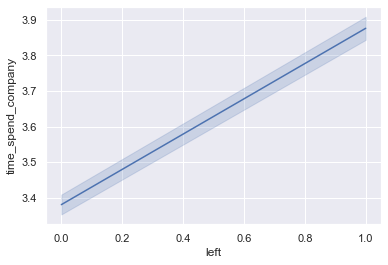

In [34]:
sns.set()
sns.lineplot(data["left"],data["time_spend_company"])
plt.show()

#### BAR PLOT

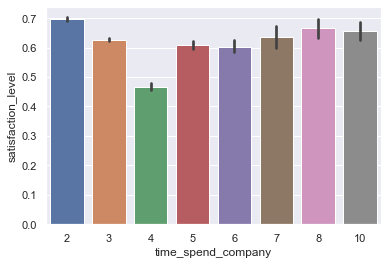

In [35]:
sns.barplot(x = "time_spend_company",y = "satisfaction_level", data = data)
plt.show()

#### COUNT PLOT

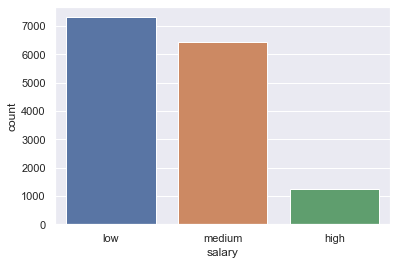

In [36]:
sns.countplot(x = data["salary"])
plt.show()

#### PIE CHART

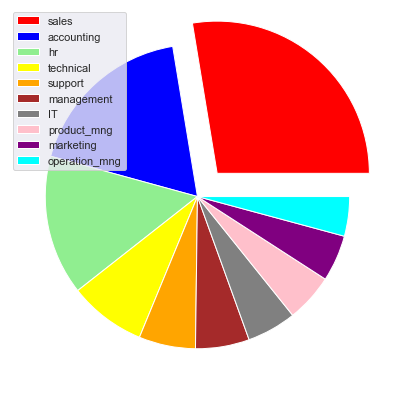

In [37]:
plt.figure(figsize = (7,7))
plt.pie(data.sales.value_counts(),
        explode = [0.2,0,0,0,0,0,0,0,0,0],
        colors = ["red","blue","lightgreen","yellow","orange","brown","grey","pink","purple","cyan"])
plt.legend(data["sales"].unique(),loc = "upper left")
plt.show()

#### BAR PLOT

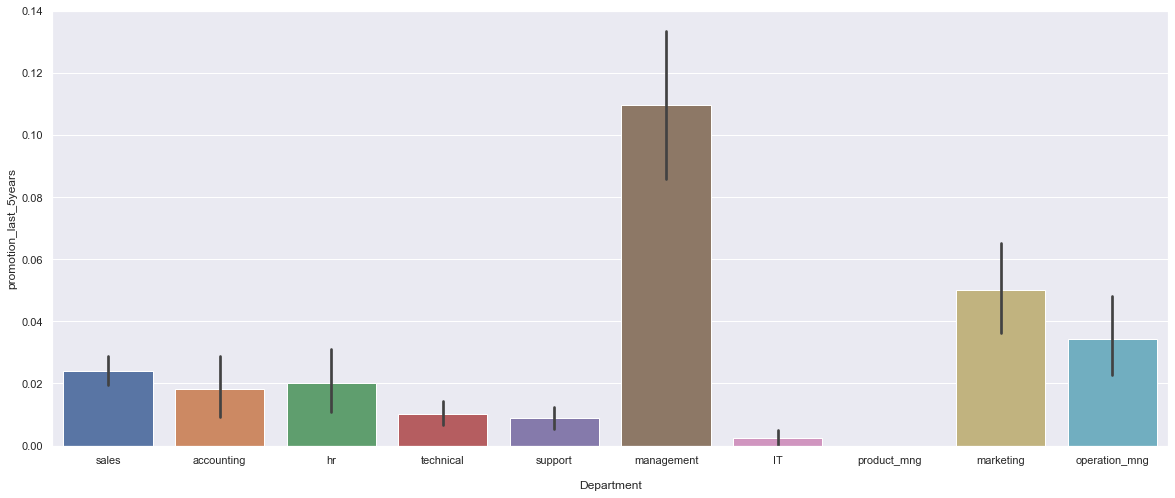

In [38]:
plt.figure(figsize = (20,8))
sns.barplot(x = "sales", y ="promotion_last_5years", data = data)
plt.xlabel("\nDepartment")
plt.show()

#### PAIR PLOT

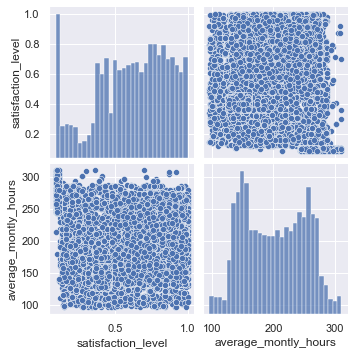

In [39]:
sns.pairplot(data, vars = ["satisfaction_level","average_montly_hours"])
plt.show()

#### DISTRIBUTION PLOT

Text(0.5, 1.0, 'Distribution of Data based on Satisfaction level\n')

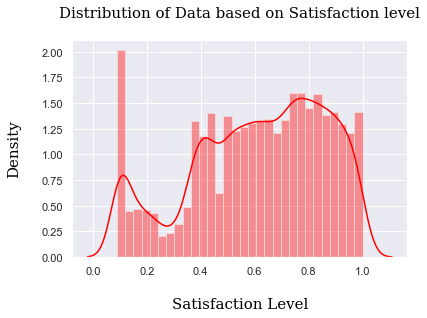

In [40]:
sns.distplot(data['satisfaction_level'], color = 'red' )
font= {'family' :'serif','color':'black','fontsize':15}
plt.xlabel("\nSatisfaction Level" ,fontdict = font)
plt.ylabel("Density\n", fontdict = font)
plt.title("Distribution of Data based on Satisfaction level\n" , fontdict=font)

#### HISTOGRAM

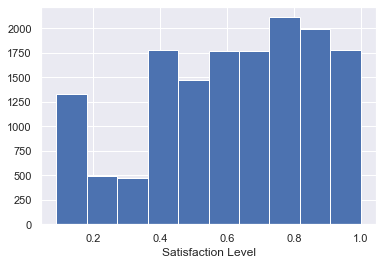

In [41]:
plt.hist(data['satisfaction_level'])
plt.xlabel("Satisfaction Level")
plt.show()

#### JOINT PLOT

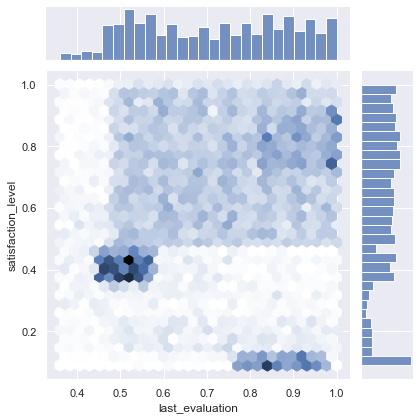

In [42]:
sns.jointplot(x = "last_evaluation",y = "satisfaction_level", data = data, kind = "hex")
plt.show()

#### HEAT MAP

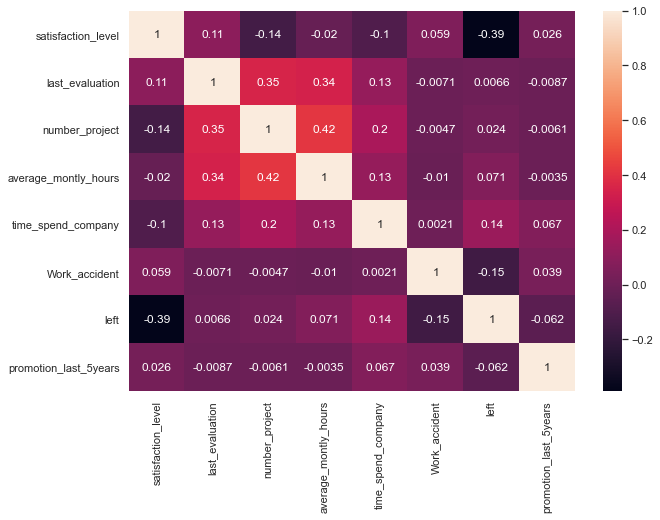

In [43]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(),annot = True)
plt.show()

### PROCESSING THE DATA

#### Rename column name from “sales” to “department”

In [44]:
data=data.rename(columns = {'sales':'department'})

#### The “left” column is the outcome variable recording one and 0. 1 for employees who left the company and 0 for those who didn’t.



#### The department column of the dataset has many categories, and we need to reduce the categories for better modelling. Let’s see all the categories of the department column

In [45]:
data["department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'operation_mng'], dtype=object)

#### Let’s add all the “technical”, “support” and “IT” columns into one column to make our analysis easier.

In [46]:
data['department']=np.where(data['department'] =='support', 'technical', data['department'])
data['department']=np.where(data['department'] =='IT', 'technical', data['department'])

#### As there are two categorical variables (department, salary) in the dataset and they need to be converted to dummy variables before they can be used for modelling.

In [47]:
department = pd.get_dummies(data['department'])
department.columns = ["department_operation_mng","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_technical"]
department

,department_operation_mng,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1
14995,0,0,0,0,0,0,0,1
14996,0,0,0,0,0,0,0,1
14997,0,0,0,0,0,0,0,1


In [48]:
salary = pd.get_dummies(data['salary'])
salary.columns = ["salary_high","salary_low","salary_medium"]
salary

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [49]:
data = pd.concat([data,department,salary],axis = 1)

In [50]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,technical,low,...,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,technical,low,...,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,technical,low,...,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,technical,low,...,0,0,0,0,0,0,1,0,1,0


#### Now the actual variables need to be removed after the dummy variable have been created. Column names after creating dummy variables for categorical variables

In [51]:
data.drop(data.columns[[8, 9]], axis=1, inplace=True)
data.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_operation_mng',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

### BUILDING A LOGISTIC REGRESSION MODEL

In [52]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_operation_mng', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=data[cols]
y=data['left']

#### The outcome variable is “left”, and all the other variables are predictors.

In [53]:
y.shape,X.shape

((14999,), (14999, 10))

#### TRAIN TEST SPLIT

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 101)

#### TRAINING

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel = LogisticRegression(solver = 'liblinear')

In [58]:
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

#### PROBABILITY VALUES AND COEFFICIENT OF THE MODEL

In [59]:
logmodel.classes_

array([0, 1], dtype=int64)

In [60]:
logmodel.intercept_

array([-0.0672521])

In [61]:
logmodel.coef_

array([[-3.71703499,  0.12102381,  0.23695589, -1.46466632, -1.06617134,
         0.13822596, -0.43176077,  0.01999404, -1.29040473,  0.5230389 ]])

#### PREDICTIONS AND EVALUTIONS

In [62]:
predictions_prob = logmodel.predict_proba(X_test)

In [63]:
predictions_prob

array([[0.90706888, 0.09293112],
       [0.88516306, 0.11483694],
       [0.96026045, 0.03973955],
       ...,
       [0.24105952, 0.75894048],
       [0.69261259, 0.30738741],
       [0.78226766, 0.21773234]])

#### PREDICTIONS

In [64]:
predictions = logmodel.predict(X_test)

In [65]:
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### EVALUTION

In [66]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3431
           1       0.51      0.25      0.34      1069

    accuracy                           0.76      4500
   macro avg       0.65      0.59      0.60      4500
weighted avg       0.73      0.76      0.73      4500



In [68]:
print(confusion_matrix(y_test,predictions))

[[3175  256]
 [ 802  267]]


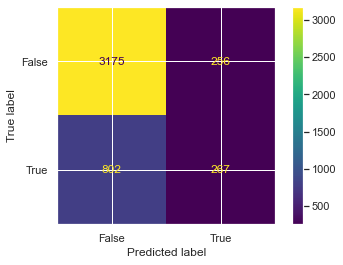

In [69]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,predictions), 
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [70]:
from sklearn.metrics import accuracy_score,recall_score,f1_score, precision_score

In [71]:
print('Recall Score: {:.3f}'.format(recall_score(y_test, predictions)))

Recall Score: 0.250


In [72]:
print('Precision Score: {:.3f}'.format(precision_score(y_test, predictions)))

Precision Score: 0.511


In [73]:
print('F1 Score: {:.3f}'.format(f1_score(y_test, predictions)))

F1 Score: 0.335


In [74]:
print('Logistic regression accuracy: {:.2f} %'.format(accuracy_score(y_test, predictions)*100)) 

Logistic regression accuracy: 76.49 %


### RANDOM FOREST CLASSIFICATION MODEL

#### TRAIN TEST SPLIT

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 101)

#### TRAINING

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf_model = RandomForestClassifier(n_estimators = 50, max_features = "auto", random_state = 44)

In [79]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

#### PROBABILITY VALUES AND COEFFICIENT OF THE MODEL

In [80]:
rf_model.predict_proba(X_test)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [81]:
rf_model.classes_

array([0, 1], dtype=int64)

#### PREDICTION AND EVALUTION

#### PREDICTION

In [82]:
rf_predictions = rf_model.predict(X_test)
rf_predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### CHECKING THE IMPORTANT FEATURES

In [83]:
rf_model.feature_importances_

array([0.50711454, 0.19077962, 0.25599352, 0.01624859, 0.00223985,
       0.00308717, 0.00293872, 0.00211888, 0.00716444, 0.01231467])

In [84]:
importances = rf_model.feature_importances_
columns = X.columns
i = 0

while i < len(columns):
    print(f" The importance of feature '{columns[i]}'is {round(importances[i] * 100, 2)}%")
    i += 1

 The importance of feature 'satisfaction_level'is 50.71%
 The importance of feature 'last_evaluation'is 19.08%
 The importance of feature 'time_spend_company'is 25.6%
 The importance of feature 'Work_accident'is 1.62%
 The importance of feature 'promotion_last_5years'is 0.22%
 The importance of feature 'department_operation_mng'is 0.31%
 The importance of feature 'department_hr'is 0.29%
 The importance of feature 'department_management'is 0.21%
 The importance of feature 'salary_high'is 0.72%
 The importance of feature 'salary_low'is 1.23%


In [85]:
imp1 = pd.DataFrame(importances,columns = ["importances"])
imp_features = imp1.assign(features = columns)
imp_features

,importances,features
0,0.507115,satisfaction_level
1,0.190780,last_evaluation
2,0.255994,time_spend_company
3,0.016249,Work_accident
4,0.002240,promotion_last_5years
5,0.003087,department_operation_mng
6,0.002939,department_hr
7,0.002119,department_management
8,0.007164,salary_high
9,0.012315,salary_low


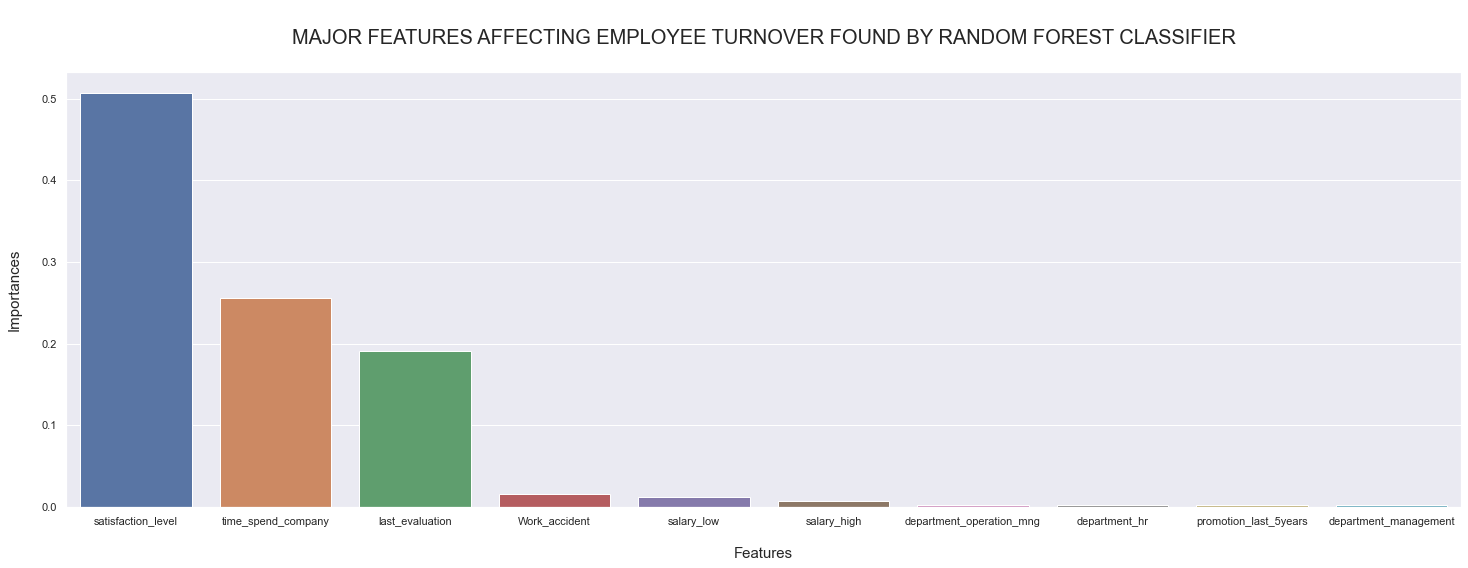

In [86]:
plt.figure(figsize = (25,8))
sns.barplot(x = "features", y = "importances",data = imp_features,
            order = imp_features.sort_values('importances',ascending = False).features)
plt.title("\nMAJOR FEATURES AFFECTING EMPLOYEE TURNOVER FOUND BY RANDOM FOREST CLASSIFIER\n",fontsize = 20)
plt.xlabel("\nFeatures",fontsize = 15)
plt.ylabel("Importances\n",fontsize = 15)
plt.show()

#### EVALUATION

In [87]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3431
           1       0.96      0.97      0.96      1069

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



In [89]:
confusion_matrix(y_test,rf_predictions)

array([[3393,   38],
       [  37, 1032]], dtype=int64)

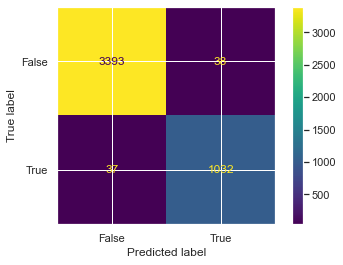

In [90]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,rf_predictions), 
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [91]:
from sklearn.metrics import accuracy_score,f1_score,recall_score

In [92]:
print('Recall Score: {:.3f}'.format(recall_score(y_test, rf_predictions)))

Recall Score: 0.965


In [93]:
print('Precision Score: {:.3f}'.format(precision_score(y_test, rf_predictions)))

Precision Score: 0.964


In [94]:
print('F1 Score: {:.3f}'.format(f1_score(y_test, rf_predictions)))

F1 Score: 0.965


In [95]:
print('Random Forest Accuracy: {:.2f} %'.format(accuracy_score(y_test,rf_predictions)*100))

Random Forest Accuracy: 98.33 %


#### VISUALIZING THE ML MODELS BASED ON THEIR ACCURACIES

In [96]:
new_dataframe = pd.DataFrame({"Model" : ["Logistic_Regression" , "Random Forest"] ,
                              "Accuracy" :[round(accuracy_score(y_test,predictions)*100,2),
                                           round(accuracy_score(y_test,rf_predictions)*100,2)]})
new_dataframe

,Model,Accuracy
0,Logistic_Regression,76.49
1,Random Forest,98.33


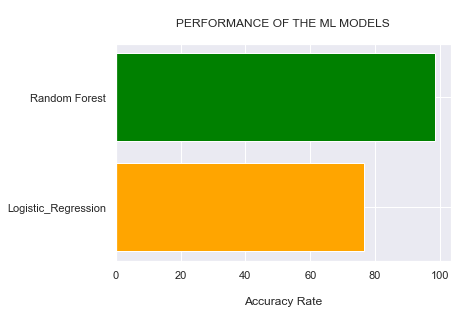

In [98]:
model = new_dataframe['Model']
acc = new_dataframe['Accuracy']
plt.barh(model,acc,color=['orange','green'])
plt.xlabel("\nAccuracy Rate\n")
plt.title("\nPERFORMANCE OF THE ML MODELS\n")
plt.show()